# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Описание проекта**. На основе данных сервиса Яндекс.Недвижимость, проводится исследование рыночной стоимости объектов недвижимости и типичных параметров квартир. 

**Ход исследования**:
1. Обзор данных.
2. Предобработка данных. 
3. Исследовательский анализ:
    1. Одномерный анализ: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления.
    2. Исследование зависимости цены от: общей площади, жилой площади, площади кухни, количества комнат, типа этажа, даты размещения.
    3. Средняя цена по населенным пунктам.
    4. Расстояние до центра города (Санкт-Петербург).
4. Общие выводы.
   


## 1. Обзор данных

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# прочитаем файл, указав нужный разделитель (знак табуляции) для корректного отображения датафрейма, и сохраним в data
data = pd.read_csv('C:/Users/alkon/practicum_projects/real_estate_project/real_estate_data.csv', sep='\t')

# выведем первые строки для знакомства с датасетом, убрав ограничения по отображению столбцов
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# посмотрим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датафрейм содержит 23699 строк. В четырнадцати столбцах присутствуют пропущенные значения, в том числе в картографических данных (среди них `parks_around3000` и `ponds_around3000`, в которых совпадает количество пропусков). В некоторых столбцах потребуется заменить тип данных (например, в `floors_total` на целые числа, `is_apartment` на булев тип и др.). Название столбца `cityCenters_nearest` приведем к общему формату (змеиный регистр).

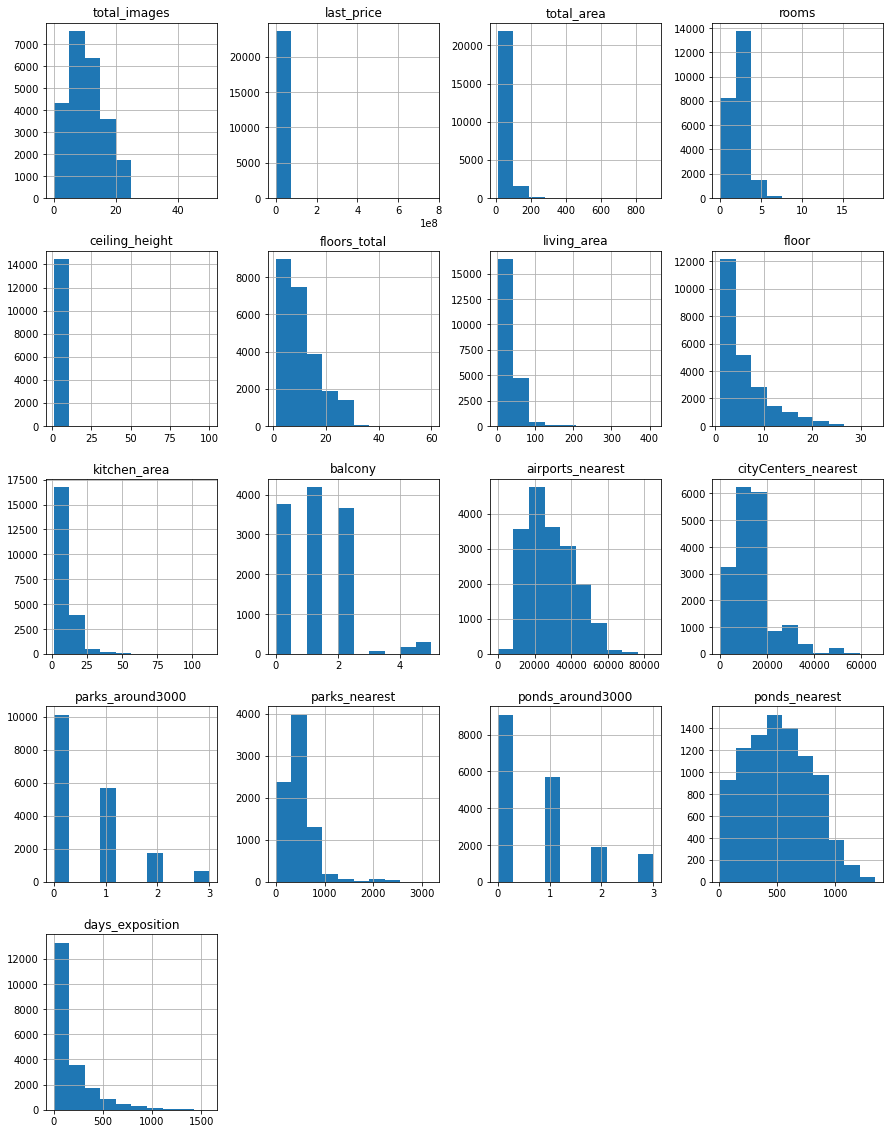

In [4]:
# построим общую гистограмму
data.hist(figsize=(15, 20));

## 2. Предобработка данных

In [5]:
# сразу приведем название столбца с расстоянием до центра к нужному формату
data.rename({'cityCenters_nearest':'city_centers_nearest'}, axis='columns', inplace=True)

Перейдем к обработке явных и неявных дубликатов, поскольку столбец c названием населенных пунктов `locality_name` понадобится нам для обработки пропусков в высоте потолков `ceiling_height`.

### Обработка дубликатов 

In [6]:
# проверим, есть ли строки явные дубликаты
data.duplicated().sum()

0

Явные дубликаты не обнаружены. Проверим столбец `locality_name`: изучим уникальные значения и удалим неявные дубликаты.

In [7]:
# проверим сколько пропусков в locality_name
data['locality_name'].isna().sum()

49

Удалим пропуски по столбцу `locality_name`, поскольку таких строк меньше 1% от всех данных.

In [8]:
# удалим пропуски
data.dropna(subset=['locality_name'], inplace=True)

In [9]:
# посмотрим уникальные значения в столбце locality_name
data['locality_name'].unique()[0:30]

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов'], dtype=object)

В столбце присутствуют типы населенных пунктов (поселок, деревня и т.д.), которые не имеют смысла для анализа и могут приводить к неявным повторам, а также слова с е/ё (поселок, посёлок). Переведем названия в нижний регистр и приведем названия к единому формату.

In [10]:
# заменим 'ё' на 'е' и приведем названия к единому регистру
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').str.lower()

# создадим список со словами, которые потребуется убрать из названий
locality_type = [
    'поселок', 'городской', 'деревня', 'городского', 'типа', 'садовое', 'товарищество', 'село', 'при', 'железнодорожной',
    'станции','садоводческое', 'некоммерческое', 'коттеджный'
]

# переберем все названия в цикле и уберем образовавшиеся лишние пробелы
for type in locality_type:
    data['locality_name'] = data['locality_name'].str.replace(type, '').str.strip()

# проверим результат
data['locality_name'].unique()[0:30]

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп'], dtype=object)

In [11]:
# проверим, есть ли строки дубликаты
data.duplicated().sum()

0

**Вывод**: явные дубликаты не были обнаружены в наборе данных. Были изучены и обработаны уникальные значения в столбце `locality_name`: для устранения возможных неявных дубликатов были удалены типы населенных пунктов, буква 'е' была изменена на 'ё', названия были приведены к нижнему регистру. Строк дубликатов не обнаружено.

### Обработка пропусков

In [12]:
# посчитаем количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Скорее всего значение `balcony` продавцы оставляют пропущенным, если балкона в квартире нет, поэтому заменим заменим пропуски на 0, а тип данных поменяем на целые числа. 

In [13]:
# заменим пропуски на 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0).astype('int')

Из 23699 строк датасета столбец `is_apartment` заполнен лишь в 2775. С учетом того, что апартаменты — это нежилые помещения, а пропусков в столбце `living_area` всего  1903, сделаем вывод, что значения в этом столбце можно заменить на False. К этому стоит добавить, что апартаменты — не самый популярный вид помещения и многие пользователи могут просто не знать, что это такое (кроме владельцев апартаментов, которые знают, что покупали). Тип значений заменим на булев. 

In [14]:
# заменим пропуски на False и изменим тип данных на bool
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

In [15]:
# количество пропущенных значений в совокупности с нулевыми в столбцах с количеством водоемов
len(data.loc[(data['ponds_around3000'].isna()) | (data['ponds_around3000'] == 0)])

14565

In [16]:
# количество пропущенных значений в совокупности с нулевыми в столбцах с количеством парков
len(data.loc[(data['parks_around3000'].isna()) | (data['parks_around3000'] == 0)])

15590

In [17]:
# проверим, какие значения содержатся в столбцах с расстоянием
print("Максимальное расстояние до парка:", data['parks_nearest'].max())
print("Максимальное расстояние до водоема:", data['ponds_nearest'].max())
print("Максимальное расстояние до аэропорта:", data['airports_nearest'].max())
print("Максимальное расстояние до центра города:", data['city_centers_nearest'].max())

Максимальное расстояние до парка: 3190.0
Максимальное расстояние до водоема: 1344.0
Максимальное расстояние до аэропорта: 84869.0
Максимальное расстояние до центра города: 65968.0


Если мы проверим проверим значения в столбцах `parks_around3000` и `ponds_around3000`, то в совокупности с нулевыми значениями пропущенные значения дадут приблизительное количество пропусков в столбцах с расстояниями `parks_nearest`, `ponds_nearest`. Сделаем вывод, что данные с расстояниями до парков и водоемов не собирались, если они находились приблизительно далее 3 км от квартиры (учитывая небольшую погрешность, наличие которой мы проверили, найдя максимальное значение расстояния до парка и водоема).

Логично предположить, что мы можем заменить дискретные значения в столбцах `parks_around3000` и `ponds_around3000` на 0, а значения в столбцах с расстояниями оставить без изменений, поскольку логичную замену предположить невозможно (более 3 км, но сколько конкретно — неизвестно); заполнение медианой в данном случае привело бы к искажению данных. По той же логике мы не будем заполнять пропуски в столбцах `airports_nearest`и `city_centers_nearest`. Пропусков в этих картографических столбцах меньше, вероятно, поскольку для них задано большее расстояние (вряд ли пользователи ищут квартиру с аэропортом в радиусе менее 3 км и расстояние до центра имеет значение, даже если оно более 3 км).

In [18]:
# заменим пропуски на 0 и изменим тип данных на int
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

Удалим строки с пропущенными значениями в столбцах `floors_total`, потому что их доля составляет меньше 1% данных и это не повлияет на результаты анализа.

In [19]:
# удалим строки с пропущенными значениями в выбранных столбцах
data.dropna(subset=['floors_total'], inplace=True)

Пропуски в столбцах `ceiling_height` могли образоваться, поскольку пользователи не знают точную высоту потолка и не заполняют еe. В столбцах `living_area` и `kitchen_area` — в случае студий, где определить размер кухни и жилую площадь затруднительно или невозможно. Исходя из данных в столбце `studio`, таких квартир всего лишь 146, остальные пропуски могли образоваться по причине недостатка информации у пользователя.

Поскольку медиана является робастной оценкой (устойчива к выбросам), мы можем произвести замену пропусков с ее помощью до того, как обработаем аномальные значения. В столбце с высотой потолка `ceiling_height` достаточно много пропусков, около 40% данных. Заполняя пропуски в этом столбце, необходимо иметь в виду, что в Санкт-Петербурге в центре находится много зданий старого фонда, в которых высота потолков выше, чем в новостройках или, например, "хрущевках", которые располагаются дальше от центра и ближе к окраинам. Чтобы отразить в данных эту важную особенность Санкт-Петербурга, выделим два диапазона по столбцу с расстоянием до центра `city_centers_nearest`: до 4 км зона, где больше всего зданий старого фонда, до 8 км зона, где могут присутствовать новостройки, но их доля не так велика. Заполним пропуски медианным значением по этим диапазонам. Оставшиеся пропуски заполним медианным значением по населенным пунктам из столбца `locality_name`.

In [20]:
# заменим пропуски медианой по диапазонам расстояния от центра
data.loc[(data['city_centers_nearest'] <= 4000) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[data['city_centers_nearest'] <= 4000, 'ceiling_height'].median()
data.loc[(data['city_centers_nearest'] <= 8000) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[(data['city_centers_nearest'] <= 8000) & (data['city_centers_nearest'] > 4000), 'ceiling_height'].median()
data['ceiling_height'].isna().sum()

7786

In [21]:
# оставшиеся пропуски заменим медианой по населенному пункту
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == name) & (data['ceiling_height'].isna()==False), 'ceiling_height'].median()
data['ceiling_height'].isna().sum()

95

Осталась незначительная доля пропусков: скорее всего, это данные по населенным пунктам, в которых нет ни одной записи с данными по высоте потолка. Проверим это и заполним оставшиеся пропуски общей медианой.

In [22]:
print(data.loc[data['ceiling_height'].isna()==True, 'locality_name'].value_counts())
print(data.loc[data['locality_name']=='кобринское', 'ceiling_height'])

кобринское            6
селезнево             5
усть-луга             5
старополье            3
рождествено           3
                     ..
форт красная горка    1
курковицы             1
реброво               1
семиозерье            1
тихковицы             1
Name: locality_name, Length: 64, dtype: int64
3163    NaN
4302    NaN
12031   NaN
12062   NaN
17332   NaN
17771   NaN
Name: ceiling_height, dtype: float64


In [23]:
# заполняем остаток пропусков общей медианой по столбцу
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Замена пропущенных значений в столбцах `living_area` и `kitchen_area` на медиану привела бы к большому количеству некорректных значений, где сумма площади кухни и жилой площади превышает общую площадь. Для замены пропусков рассчитаем коэффициент, показывающий медианную долю кухни/жилой площади от общей площади квартиры.

In [24]:
# напишем функцию, которая рассчитает коэффициент площади и с его помощью заменит пропуски в выбранном столбце
def coef(column):
    column_coef = data[column].median() / data[data[column].isna() == False]['total_area'].median()
    data[column] = data[column].fillna(data['total_area'] * column_coef)

In [25]:
# заменим пропуски в столбцах площади кухни и жилой площади с помощью написанной функции
coef('living_area')
coef('kitchen_area')

# проверим, сколько получилось некорректных значений, где сумма кухни и жилой площади превышает общую площадь
len(data.loc[(data['living_area'] + data['kitchen_area']) >= data['total_area']][:])

189

Некорректных значений меньше 1% набора данных, поэтому избавимся от них.

In [26]:
# сделаем срез по данным, где сумма кухни и жилой площади не превышает общую площадь
data = data.loc[(data['living_area'] + data['kitchen_area']) < data['total_area']][:]

Пропуски в столбце `days_exposition`, который не заполняется пользователем, вероятнее всего образовались по технической причине. В этом столбце нет нулевых значений, поэтому, вероятно, пропуски — это объявления, которые были размещены менее одного дня; либо это объявления, которые еще не закрыты. Поскольку нет возможности определить это точно, оставим пропуски в этом столбце. 

In [27]:
# посчитаем количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5461
city_centers_nearest     5438
parks_around3000            0
parks_nearest           15404
ponds_around3000            0
ponds_nearest           14398
days_exposition          3149
dtype: int64

**Вывод**: пропуски в столбцах `balcony`, `parks_around3000`, `ponds_around3000` были заполнены нулевыми значениями. Пропуски в столбце `is_apartment` заменены на *False* (квартира не является апартаментами). Пропуски в столбцах `kitchen_area` и `living_area` были заменены с помощью рассчитанного коэффициента. Пропуски в `ceiling_height` заменены медианным значением в зависимости от удаленности от центра и по населенному пункту. Строки с пропущенными значениями в столбцах `floors_total` и `locality_name` (менее 1%) были удалены. Были оставлены пропуски в столбцах с числовыми картографическими данными и автоматически заполняемом столбце `days_exposition`.

В полях с данными, которые вводят пользователи, пропуски в общем могут образовываться по нескольким причинам: во-первых, пользователи оставляют пропущенными значения, если это значения булева типа (не указывают ничего в поле с балконом, если балкона нет), во-вторых, если пользователи затрудняются указать значение (например, точную высоту потолка или жилую площадь), в-третьих, по причине базового человеческого фактора (если у пользователя есть свобода заполнять ячейку в любом формате или не заполнять вовсе, то по разным причинам он может ее не заполнить или заполнить неверно, что приведет к неверной выгрузке данных). 

Поскольку картографические данные скорее всего подтягиваются автоматически, пропуски в этих столбцах могут образовываться из-за технической ошибки, недоработки: нужно сообщить о такой вероятности коллегам из бэкенда. Либо это предусмотренная особенность выгрузки данных для определенных параметров. 

### Типы данных

Выше мы уже заменили тип данных в некоторых столбцах в процессе обработки пропусков.

В столбце `first_day_exposition` необходимо заменить тип данных на с *object* на *datetime*, поскольку далее это позволит производить операции с датой (например, выделить дни недели). В столбцах `balcony`, `parks_around3000`, `ponds_around3000` тип *float64* заменили на *int64*, поскольку количество балконов, парков и водоемов должно быть целым числом, по той же логике заменим тип в `floors_total` (количество этажей). В столбце `is_apartment` содержится булев тип данных (является апартаментами или нет). Большинство значений в столбце `days_exposition` — целые числа, а числа с точкой больше похожи на образовавшиеся в результате технической неполадке при выгрузке, следовательно здесь тип данных также целесообразно было бы заменить на *int64*, однако из-за наличия пропусков оставим *float64*.

In [28]:
# в столбце с датой размещения отсутствуют данные о времени, оставим только дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

# убедимся, что тип данных float из-за наличия NaN 
# data['floors_total'].unique()
data['floors_total'] = data['floors_total'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23376 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23376 non-null  int64         
 1   last_price            23376 non-null  float64       
 2   total_area            23376 non-null  float64       
 3   first_day_exposition  23376 non-null  datetime64[ns]
 4   rooms                 23376 non-null  int64         
 5   ceiling_height        23376 non-null  float64       
 6   floors_total          23376 non-null  int32         
 7   living_area           23376 non-null  float64       
 8   floor                 23376 non-null  int64         
 9   is_apartment          23376 non-null  bool          
 10  studio                23376 non-null  bool          
 11  open_plan             23376 non-null  bool          
 12  kitchen_area          23376 non-null  float64       
 13  balcony         

**Вывод**: типы данных изучены и приведены к нужным.

### Поиск и обработка аномальных значений

Аномальные значения могут присутствовать в столбцах `rooms`, `total_area`, `ceiling_height`, `days_exposition`, `last_price`, `living_area`, `kitchen_area`, `floor`, `floors_total`. Проверим эти столбцы.

In [29]:
# посмотрим, какие данные содержатся в столбце со стоимостью
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
16219       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23376, dtype: float64

Для удобства переведем значения в Квартиры в Ленобласти вполне могут стоить 430 тыс., однако 12 тыс. — аномально низкое значение, которое нужно отбросить. Проверим крайние диапазоны значений.

In [30]:
data.loc[data['last_price'] >= 200000000, ('rooms','locality_name', 'last_price', 'total_area', 'city_centers_nearest')
        ].sort_values(by='last_price')

,rooms,locality_name,last_price,total_area,city_centers_nearest
5893,6,санкт-петербург,230000000.0,500.0,5297.0
13749,6,санкт-петербург,240000000.0,410.0,5297.0
16461,6,санкт-петербург,245000000.0,285.7,6235.0
22831,2,санкт-петербург,289238400.0,187.5,1073.0
15651,7,санкт-петербург,300000000.0,618.0,5297.0
1436,3,санкт-петербург,330000000.0,190.0,1197.0
14706,5,санкт-петербург,401300000.0,401.0,2389.0
19540,12,санкт-петербург,420000000.0,900.0,7877.0
12971,7,санкт-петербург,763000000.0,400.0,3956.0


Дорогие квартиры имеют большую площадь и расположены в центре Санкт-Петербурга: данные выглядят правдоподобно. Мы допускаем, что элитное жилье в центре Санкт-Петербурга могло продаваться за 763 млн руб. Ниже посмотрим на эти данные подробнее.

In [31]:
# проверим, есть ли квартиры дешевле 1 млн руб. в Санкт-Петербурге
data[(data['last_price'] <=1000000) & (data['locality_name']=='санкт-петербург')]['last_price'].count()

1

In [32]:
# посмотрим на дешевые квартиры стоимостью менее 500 тыс. рублей
data.loc[data['last_price'] < 500000, ('rooms','locality_name', 'last_price', 'total_area', 'city_centers_nearest')
        ].sort_values(by='last_price')

,rooms,locality_name,last_price,total_area,city_centers_nearest
8793,2,санкт-петербург,12190.0,109.0,9176.0
14911,2,свирь,430000.0,54.0,NaN
17456,1,сланцы,430000.0,30.4,NaN
16274,1,старополье,440000.0,40.0,NaN
5698,2,будогощь,450000.0,42.0,NaN
9581,2,старополье,450000.0,43.4,NaN
16219,2,вахнова кара,450000.0,38.5,NaN
17676,1,ям-тесово,450000.0,36.5,NaN
21912,1,совхозный,470000.0,37.0,NaN
23484,2,сланцы,470000.0,44.5,NaN


Данные выглядят правдоподобно: все дешевые квартиры находятся в области. Уберем единственную ошибочную строку, остальные значения оставим как есть. 

In [33]:
# уберем одну строку командой drop
data = data.drop(index=8793)

# проверим результат
data['last_price'].sort_values()

17456       430000.0
14911       430000.0
16274       440000.0
16219       450000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23375, dtype: float64

In [34]:
# проверим, какие значения содержатся в столбце с высотой потолков
data['ceiling_height'].sort_values()

22590     1.00
5712      1.20
16934     1.75
16446     2.00
19329     2.00
         ...  
4876     27.00
2158     27.00
20478    27.00
22336    32.00
3148     32.00
Name: ceiling_height, Length: 23375, dtype: float64

In [35]:
# выведем отдельно квартиры с высокими потолками
data.query('6 <= ceiling_height <= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,False,False,7.300000,0,нурма,NaN,NaN,0,NaN,0,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,False,False,8.300000,1,санкт-петербург,13069.0,10763.0,0,NaN,1,613.0,14.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16,41.0,1,False,False,False,8.000000,0,санкт-петербург,32691.0,11035.0,1,723.0,0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.0,2,False,False,False,9.379653,1,красное,24638.0,28062.0,0,NaN,0,NaN,469.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7,147.0,7,False,False,False,15.600000,0,санкт-петербург,26902.0,5605.0,3,484.0,1,305.0,259.0


В столбце `ceiling_height` есть значения от 25 до 32: логично предположить, что это вещественные значения 2.5 и 3.2 м. Заменим их, поделив все значения на 10. В данных также есть небольшое количество квартир с высотой потолка приблизительно от 6 до 10 м, от них мы тоже избавимся, поскольку данные выглядят неправдоподобно относительно цены, расположения и размера квартиры (это не могут быть премиум квартиры с двумя уровнями). Поделим все значения на 10, что как раз сделает этот диапазон достаточно маленьким, чтобы его отсечь (будем считать, что минимальная высота потолка по нормам и стандартам от 2.4 м).

In [36]:
# делим значения высоты в выбранном диапазоне на 10
data.loc[(data['ceiling_height'] > 6) & (data['ceiling_height'] <= 35), 'ceiling_height'] /= 10 
# выбираем значения в диапазоне от 2.4 м до 6 м, избавляемся от выброса в 100 м
data = data.loc[(data['ceiling_height'] < 100) & (data['ceiling_height'] >= 2.4)][:]

# проверяем результат
data['ceiling_height'].sort_values()

2236     2.4
11125    2.4
14345    2.4
15453    2.4
17601    2.4
        ... 
1026     5.3
12628    5.3
7578     5.5
1388     5.6
20264    6.0
Name: ceiling_height, Length: 23347, dtype: float64

In [37]:
# проверим, какие значения содержатся в столбце c количеством комнат
sorted(data['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

В данных присутствуют квартиры с нулем комнат и очень большим количеством комнат. Предварительно предположим, что ноль указан в студиях и квартирах с открытой планировкой, а квартиры с большим количеством комнат являются бывшими коммунальными квартирами: они распространены в Санкт-Петербурге. Проверим это.

In [38]:
# проверим, есть ли квартиры с нулем комнат, не являющиеся студиями и не свободной планировки
len(data[(data['rooms']==0) & ((data['studio']=='False') | (data['open_plan']=='False'))])

0

In [39]:
# проверим площадь, цену и населенный пункт квартир с 10 и более комнатами
data.loc[data['rooms'] >= 10, ('rooms','locality_name', 'last_price', 'total_area')].sort_values(by='total_area')

,rooms,locality_name,last_price,total_area
648,11,санкт-петербург,17500000.0,183.7
9688,11,санкт-петербург,33000000.0,194.1
18119,10,санкт-петербург,15500000.0,216.1
20829,14,санкт-петербург,28659000.0,245.4
18848,16,санкт-петербург,28500000.0,270.0
4149,10,санкт-петербург,23000000.0,272.6
18891,10,санкт-петербург,40000000.0,290.0
866,14,санкт-петербург,25000000.0,363.0
14498,19,санкт-петербург,32250000.0,374.6
5358,15,санкт-петербург,65000000.0,590.0


Поскольку все квартиры с нулем комнат либо свободной планировки, либо студии, оставим нулевые значения. Квартиры с большим количеством комнат на данном этапе также оставим, поскольку они выглядят как бывшие коммунальные: у них большой площади и находятся в Санкт-Петербурге.

In [40]:
# проверим, какие значения содержатся в столбце 'total_area'
data['total_area'].sort_values()

19807     13.0
19546     13.0
17961     13.0
19558     13.2
19642     14.0
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23347, dtype: float64

Квартиры c малой площадью вплоть до 13 м вполне возможны в Санкт-Петербурге: часто квартиры в домах старого фонда переделывают уже не в коммунальные, а в отдельные квартиры-студии. Проверим, сколько комнат в квартирах с маленькой площадью и являются ли они студиями. Если нет, то заменим на студии с нулем комнат: пользователи часто указывают 1-комнатную квартиру вместо студии, особенно если в квартире так или иначе выполнено зонирование. Есть квартиры с очень большой площадью. Также взглянем на них поближе.

In [41]:
# проверяем маленькие квартиры 
data.loc[(data['total_area'] <= 20) & (data['rooms'] > 0), 
         ('total_area', 'rooms', 'studio', 'kitchen_area', 'locality_name','last_price')].head(10)

,total_area,rooms,studio,kitchen_area,locality_name,last_price
4077,20.0,2,False,5.600000,санкт-петербург,3000000.0
4542,18.0,1,False,3.126551,санкт-петербург,3300000.0
6084,18.0,1,False,3.000000,тихвин,770000.0
8729,18.4,1,False,2.400000,пушкин,2200000.0
10208,17.0,1,False,3.000000,санкт-петербург,1900000.0
10964,20.0,1,False,3.473945,всеволожск,1150000.0
12040,15.0,1,False,2.605459,сосновый бор,1900000.0
12881,18.5,1,False,3.213400,сосновый бор,1500000.0
16949,15.0,1,False,2.605459,санкт-петербург,1550000.0
16991,20.0,1,False,3.473945,мурино,1750000.0


In [42]:
# заменяем тип на студии, а количество комнат на 0
data.loc[data['total_area'] <= 20, 'studio'] = True
data.loc[data['total_area'] <= 20, 'rooms'] = 0

# заменим тип на студии также в квартирах с площадью до 35 м с очень маленькой кухней до 4 м
data.loc[(data['total_area'] <= 35) & (data['kitchen_area'] <= 4), 'studio'] = True
data.loc[(data['total_area'] <= 35) & (data['kitchen_area'] <= 4), 'rooms'] = 0

# приведем тип данных в количестве комнат к целочисленному 
data['rooms'] = data['rooms'].astype('int') 

In [43]:
data.loc[data['total_area'] > 500, ('total_area', 'rooms','locality_name','last_price', 'city_centers_nearest')
        ].sort_values(by='total_area', ascending=False)

,total_area,rooms,locality_name,last_price,city_centers_nearest
19540,900.0,12,санкт-петербург,420000000.0,7877.0
12859,631.2,7,санкт-петербург,140000000.0,4972.0
3117,631.0,7,санкт-петербург,140000000.0,4972.0
15651,618.0,7,санкт-петербург,300000000.0,5297.0
5358,590.0,15,санкт-петербург,65000000.0,4666.0
4237,517.0,7,санкт-петербург,50000000.0,1847.0
8018,507.0,5,санкт-петербург,84000000.0,5735.0


Ручная проверка показала, что в Санкт-Петербурге действительно есть квартира площадью 900 кв.м, ее параметры в данных так же выглядят правдоподобно. На этом этапе оставим строку с этой квартирой, поскольку данные по ней вряд ли ошибочные, однако учтем ее как единичный/нетипичный случай ниже на этапе EDA.

In [44]:
# посмотрим на значения в столбце с площадью кухни
data['kitchen_area'].sort_values()

20217      1.3
11033      2.0
906        2.0
9138       2.0
19642      2.0
         ...  
16239     93.2
5358     100.0
2489     100.7
20215    107.0
19540    112.0
Name: kitchen_area, Length: 23347, dtype: float64

Проверим крайние значения: находятся ли большие кухни в маленьких квартирах, а также взглянем на квартиры с маленькой кухней до 4 м (минимальная площадь кухни по устаревшему стандарту), в которых от одной комнаты.

In [45]:
# проверим, есть ли квартиры меньше 100 кв. м с кухней больше 50 кв. м
len(data[(data['kitchen_area'] > 50) & (data['total_area'] < 100)])

0

In [46]:
# посмотрим на квартиры с кухней до 4 м и больше 0 комнат
data.loc[(data['kitchen_area']<4) & (data['rooms']>0) , 
         ('kitchen_area', 'total_area', 'rooms', 'living_area', 'locality_name','last_price', 'city_centers_nearest')
        ].sort_values(by='kitchen_area', ascending=True)

,kitchen_area,total_area,rooms,living_area,locality_name,last_price,city_centers_nearest
7950,2.89,66.4,2,44.4,санкт-петербург,5967734.0,20802.0
3078,3.20,43.0,2,29.3,санкт-петербург,6000000.0,5247.0
14836,3.30,45.0,2,28.4,стрельна,3900000.0,23654.0
12595,3.40,44.4,2,28.4,санкт-петербург,3700000.0,13609.0
12370,3.50,59.2,2,32.6,санкт-петербург,7575000.0,14545.0
14183,3.50,47.0,2,36.0,санкт-петербург,5200000.0,2998.0
8712,3.70,42.7,2,27.5,санкт-петербург,14948000.0,3914.0
11475,3.80,40.8,2,26.8,яльгелево,2500000.0,NaN


Во всех обнаруженных квартирах 2 комнаты и очень маленькая кухня, характерная для студий. Вероятно, это "евродвушки", где площадь кухни разбита на "жилую зону" и собственно кухню. Можно было бы заменить количество комнат здесь на 1 и высчитать предполагаемую площадь кухни через коэффициент или как 40% от общей площади, но таких строк очень мало, поэтому не будем тратить время и отбросим их.

In [47]:
# удалим строки с квартирами, в которых больше 1 и кухня меньше 4 м
data = data.loc[~((data['kitchen_area']<4) & (data['rooms']>0))][:]

In [48]:
# посмотрим на значения в столбце с жилой площадью
data['living_area'].sort_values()

13915      2.000000
21758      2.000000
23574      3.000000
3242       3.000000
17582      5.000000
            ...    
4237     332.000000
12401    347.500000
3117     364.038462
5358     409.000000
19540    409.700000
Name: living_area, Length: 23339, dtype: float64

Высокие значения площади вплоть до 409 м вполне возможны для элитного жилья в Санкт-Петербурге. Есть строки с очень маленькой жилой площадью до 6 кв. м, их немного, поэтому удалим их. Такой диапазон оправдан, поскольку в Санкт-Петербурге есть студии с очень маленькой общей площадью.

In [49]:
# удалим строки со значением жилой площади до 6 кв. м
data = data.loc[data['living_area'] >= 6][:]

In [50]:
# проверяем этажи, на которых расположены квартиры
data['floor'].sort_values()

23698     1
18810     1
12513     1
12514     1
12517     1
         ..
11079    29
1917     30
18629    31
11575    32
18218    33
Name: floor, Length: 23333, dtype: int64

In [51]:
# проверяем общее количество этажей
data['floors_total'].sort_values()

21603     1
17744     1
7962      1
3076      1
18900     1
         ..
5807     36
397      36
11079    36
16731    52
2253     60
Name: floors_total, Length: 23333, dtype: int32

Самый высокий ЖК в Санкт-Петербурге — 37-ми этажное здание, поэтому мы отбросим строки с большим значением. Многоквартирные одноэтажные дома могут располагаться в Ленобласти. Посмотрим на данные подробнее.

In [52]:
# выведем одноэтажные дома и проверим, есть ли такие в Санкт-Петербурге
print('Одноэтажные дома в СПб:', len(data[(data['floors_total']<2) & (data['locality_name']=='санкт-петербург')]))
data.loc[data['floors_total']<2, ('floors_total','locality_name', 'floor')].sort_values(by='floor')

Одноэтажные дома в СПб: 2


,floors_total,locality_name,floor
3076,1,волосово,1
22550,1,сестрорецк,1
21603,1,сосново,1
19590,1,рощино,1
18900,1,свирьстрой,1
17744,1,суйда,1
17020,1,каськово,1
16444,1,оредеж,1
15543,1,большая ижора,1
11746,1,большие колпаны,1


Одноэтажные дома в Ленобласти выглядят правдоподобно и общее количество этажей в них равно этажу квартиры. Таких квартир в Санкт-Петербурге всего лишь 2, допустим, что они могли бы быть в некоторых районах (например, в районе метро Озерки).

In [53]:
# удалим строки с количеством этажей больше 37
data = data.loc[data['floors_total'] <= 37][:]

# проверим результат
data['floors_total'].sort_values()

19590     1
7962      1
16444     1
17744     1
22841     1
         ..
12960    35
15982    35
5807     36
397      36
11079    36
Name: floors_total, Length: 23331, dtype: int32

In [54]:
# посмотрим, какие значения содержатся в столбце с балконами
data['balcony'].value_counts().sort_values()

3       79
4      180
5      299
2     3605
1     4145
0    15023
Name: balcony, dtype: int64

In [55]:
# сбросим индексы после удаления строк
data = data.reset_index(drop=True)

Присутствуют квартиры с 3-5 балконами. С учетом наличия квартир большой площади и принадлежащих к старому фонду или элитному жилью, выглядит правдоподобно. Однако проверим, нет ли квартир с небольшой площадью и большим количеством балконов.

In [56]:
# выведем данные по квартирам с 4 и более балконами и площадью менее 100 кв.м
data.loc[(data['balcony']>=4) & (data['total_area']<100), ('balcony', 'total_area', 'locality_name', 'rooms')
        ].sort_values(by='total_area', ascending=False)

,balcony,total_area,locality_name,rooms
10745,5,98.60,всеволожск,3
7711,4,98.60,санкт-петербург,3
19986,4,98.50,санкт-петербург,3
8801,5,98.00,санкт-петербург,3
11104,5,98.00,красное,4
...,...,...,...,...
642,4,36.00,кронштадт,1
11404,5,35.95,мурино,1
13432,5,35.00,мурино,1
16302,4,33.50,луга,1


Такие квартиры похожи на аномалии с некорректно введенным значением балконов. Однако их немного и дальше в исследовании эти данные нам не пригодятся. Поэтому оставим эти значения.

In [57]:
# посмотрим на количество дней размещения, не учитывая оставленные пропуски
data.loc[data['days_exposition'].isna()==False, 'days_exposition'].sort_values()
len(data[data['days_exposition'] > 1000])

274

Некоторые квартиры продавались более 2-3 лет. Доля таких квартир невелика, поэтому мы можем допустить, что это реальные значения (некоторые квартиры трудно продаются). Оставим их.

**Выводы**: были изучены и обработаны аномальные значения в столбцах датафрейма.
* В столбце `last_price` было удалено аномально низкое значение 12 тыс.
* В столбце `ceiling_height` ошибочные значения 25-35 м были преобразованы в числа с плавающей точкой (2.5-3.5 м), удалены аномально высокие и низкие значения вне диапазона 2.4-6 м. 
* Были изучены данные в столбце `rooms`: квартиры с большим количеством комнат характерны для бывших коммунальных квартир старого фонда, квартиры с 0-1 комнат были исследованы и заполнены типом "студия" (`studio`) с 0 комнат по размеру жилой площади и соотношению площади и кухни.
* В столбце `total_area` было выявлено одно аномально высокое значение 900 кв. м, однако, поскольку оно является правдоподобным, на данном этапе мы его оставили и учтем в исследовательском анализе данных как выброс. Квартиры-студии с маленькой площадью (до 13 м) характерны для центра Санкт-Петербурга, поэтому были оставлены.
* В столбце `kitchen_area` были изучены большие значения и удалены строки, в которых при этом площадь квартиры была менее 100 м. Были удалены двухкомнатные квартиры (потенциально "евродвушки"), кухня которых аномально маленькая. 
* В столбце `living_area` квартиры с жилой площадью менее 6 кв. м были удалены.
* В столбце `floor` аномальных значений не обнаружено.
* В столбце `floors_total` были удалены квартиры в домах с более 37 этажами (по самому высокому ЖК в Петербурге). 
* В столбце `balcony` были обнаружены странные значения (маленькие квартиры с 5 балконами), однако было принято решение оставить их, поскольку этот столбец не будет участвовать в анализе далее. 
* В столбце `days_exposition` были обнаружены квартиры, которые продавались более 2-3 лет, однако с учетом их небольшой доли было принято решение не удалять эти строки.

### Результаты предобработки

In [58]:
# просмотрим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23331 entries, 0 to 23330
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23331 non-null  int64         
 1   last_price            23331 non-null  float64       
 2   total_area            23331 non-null  float64       
 3   first_day_exposition  23331 non-null  datetime64[ns]
 4   rooms                 23331 non-null  int32         
 5   ceiling_height        23331 non-null  float64       
 6   floors_total          23331 non-null  int32         
 7   living_area           23331 non-null  float64       
 8   floor                 23331 non-null  int64         
 9   is_apartment          23331 non-null  bool          
 10  studio                23331 non-null  bool          
 11  open_plan             23331 non-null  bool          
 12  kitchen_area          23331 non-null  float64       
 13  balcony         

In [59]:
# выведем первые строки датасета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.615,11,18.600000,1,False,False,False,11.000000,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.700,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,3.000,14,91.730769,9,False,False,False,27.617866,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.650,12,14.400000,5,False,False,False,9.100000,0,янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.640,26,10.600000,6,False,False,False,14.400000,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.700,24,41.307692,22,False,False,False,18.900000,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.700,27,15.430000,26,False,False,False,8.810000,0,мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.600000,7,False,False,False,6.500000,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Была проведена предобработка данных, в результате которой данные были очищены от пропусков (кроме тех, замену для которых предположить невозможно/нецелесообразно), проверены на явные и неявные дубликаты, аномальные (некорректные) значения были выявлены и удалены по необходимости. Было удалено менее 2% строк датасета.

### Создание новых столбцов

In [60]:
# добавим столбец с ценой одного квадратного метра, переводя в целочисленный тип
data['price_per_square'] = (data['last_price'] / data['total_area']).astype('int')
# добавим столбец с днем недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
# добавим столбец с месяцем публикации объявления
data['month'] = data['first_day_exposition'].dt.month
# добавим столбец с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [61]:
# напишем функцию, которая присваивает квартире тип этажа
# - "первый", если 'floor' равно 1;
# - "последний", если 'floor' = 'total_floor';
# - "другой" в остальных случаях

def floor_category(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'

# добавим столбец, применяя функцию к датасету с помощью apply
data['floor_category'] = data.apply(floor_category, axis=1)

# проверим результат
data['floor_category'].value_counts()

другой       17176
последний     3283
первый        2872
Name: floor_category, dtype: int64

In [62]:
# добавим столбец с расстоянием до центра города в километрах и округлим до целых значений
data['city_centers_km'] = data['city_centers_nearest'].div(1000).round()

In [63]:
# выведем первые строки новых столбцов датасета
data.loc[:, ['price_per_square', 'weekday', 'month', 'year', 'floor_category', 'city_centers_km']].head(10)

,price_per_square,weekday,month,year,floor_category,city_centers_km
0,120370,3,3,2019,другой,16.0
1,82920,1,12,2018,первый,19.0
2,92785,3,8,2015,другой,14.0
3,408176,4,7,2015,другой,7.0
4,100000,1,6,2018,другой,8.0
5,95065,0,9,2018,другой,NaN
6,99195,3,11,2017,другой,19.0
7,110544,3,4,2019,другой,12.0
8,87454,2,5,2018,другой,NaN
9,88524,6,2,2017,другой,15.0


**Вывод**: были добавлены столбцы `price_per_square`, `weekday`, `month`, `year`, `floor_category`, `city_centers_km`.

## 3. Исследовательский анализ

### Исследование параметров квартир

Необходимо изучить и описать параметры: 
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

##### Общая площадь

In [64]:
# получим числовое описание данных по площади
data['total_area'].describe()

count    23331.000000
mean        60.403884
std         35.706425
min         13.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Межквартильный размах находится в диапазоне от 40 до 70 кв.м. Среднее (60 кв.м) больше медианы (52 кв.м), поскольку в данных присутствует выбросы (квартиры с очень большой площадью), минимальное значение 13 кв.м, максимальное значение 900 кв.м. Визуализируем разброс данных, чтобы узнать долю выбросов и определить диапазон нормальных значений.

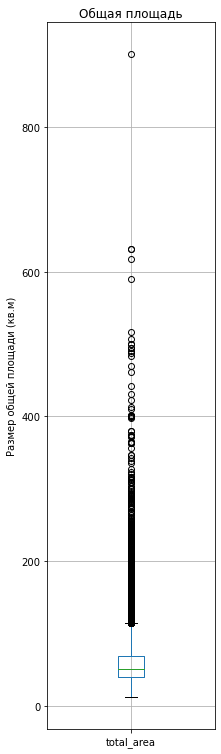

In [65]:
# построим график boxplot для визуализации распределения данных
data.boxplot('total_area', figsize=(3, 13))
plt.title('Общая площадь')
plt.ylabel('Размер общей площади (кв.м)')
plt.show()

Диапазон нормальных значений находится примерно от 20 кв.м до 120-130 кв.м. Выбросы до 350-360 кв.м плотно сгруппированы, далее чуть менее плотно отражены значения до 500 кв.м, эти квартиры вероятнее всего представляют центральную историческую часть Санкт-Петербурга с большими квартирами старого фонда, а также элитный сегмент жилья. Квартиры с площадью приблизительно более 520 кв.м отражены как единичные выбросы, удалим эти строки для удобства дальнейшего анализа.

Будем иметь в виду выбросы, отражающие особенности Санкт-Петербурга. Построим гистограмму для нормального размаха значений (20-130 кв.м), чтобы визуализировать их распределение.

In [66]:
# уберем строку с 900 кв.м
data = data.loc[data['total_area']<530][:]

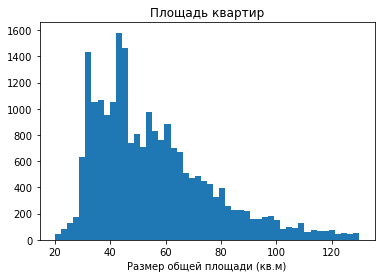

In [67]:
# построим гистограмму для выбранного диапазона
plt.hist(data['total_area'], bins=50, range=(20,130))
plt.title('Площадь квартир')
plt.xlabel('Размер общей площади (кв.м)')
plt.show()

Распределение квартир по площади тяготеет к нормальному, однако график скошен вправо и в выбранном диапазоне видны несколько пиков: около 30 кв. м (сделаем предположение, что это типовые по размеру студии/однокомнатные квартиры, "хрущевки" или квартиры в новостройках на окраинах с большим количеством студий) и около 45-50 кв.м (среднее значение).

<AxesSubplot:>

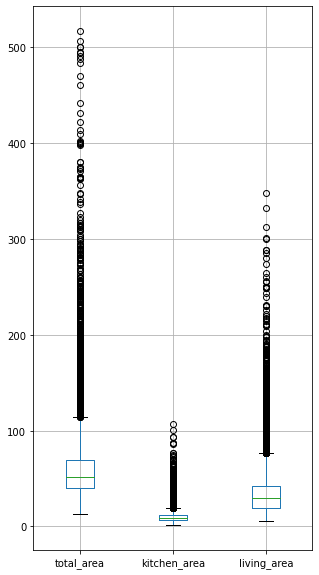

In [68]:
# убедимся, что распределение данных по площадям выглядит реалистично
columns_boxplot = ['total_area', 'kitchen_area', 'living_area']
data.boxplot(columns_boxplot, figsize=(5, 10))

##### Жилая площадь

In [69]:
# получим числовое описание данных по жилой площади
data['living_area'].describe()

count    23326.000000
mean        34.511013
std         21.856767
min          6.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        347.500000
Name: living_area, dtype: float64

Среднее значение — 34 кв.м жилой площади, медианное — 30 кв.м.Межквартильный размах 19-42 кв.м. Построим гистограмму для визуализации диапазона 6-100 кв.м. 

Среднее значение — 34 кв.м жилой площади, медианное — 30 кв.м.Межквартильный размах 19-42 кв.м. Построим гистограмму для визуализации диапазона 6-100 кв.м. 

График по жилой площади похож на график по общей, так же выделяются два пика. Пик возле значений приблизительно 17 кв.м мог образоваться из-за популярности небольших по площади квартир с минимальным размером площади кухни. Второй пик приходится приблизительно на 30 кв.м жилой площади: большей популярностью пользуются небольшие квартиры. 

##### Площадь кухни

In [70]:
# получим числовое описание данных по площади кухни
data['kitchen_area'].describe()

count    23326.000000
mean        10.457995
std          5.900941
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Средняя кухня площадью примерно 9-10 кв.м, минимальное значение 1.3 кв.м характерно для маленьких студий, максимальное значение 107 кв.м для — элитного жилья. Межквартильный размах — 7-12 кв.м. Построим гистограмму для диапазона 1.3-30 кв.м.

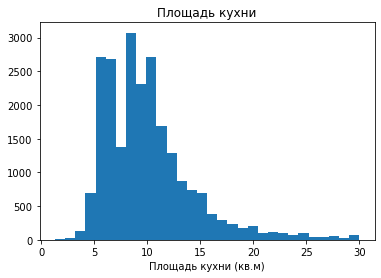

In [71]:
# построим гистограмму для выбранного диапазона
plt.hist(data['kitchen_area'], bins=30, range=(1.3,30))
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни (кв.м)')
plt.show()

Так же наблюдаем два пика: больше всего квартир с кухней 5-6 кв.м (около минимального стандартного значения, более устаревший стандарт) и 8 кв.м (более новый минимальный стандарт размера кухни). График соответствует ожидаемому распределению значений.

##### Цена на момент снятия с публикации

In [72]:
# получим числовое описание данных по цене квартиры, отразим в тысячах
data['last_price'].describe()/1000

count        23.326000
mean       6493.973700
std       10298.528552
min         430.000000
25%        3434.250000
50%        4650.000000
75%        6799.000000
max      763000.000000
Name: last_price, dtype: float64

Среднее значение 6.5 млн руб., медианное — 4.7 млн руб. Самая дорогая квартира стоит 763 млн руб. Минимальная цена квартиры 430 тыс. руб. Межквартильный размах — 3.5-6.8 млн руб. Среднее значение выше медианного, есть очень дорогие квартиры (среднее выше медианы). Посмотрим на распределение данных и выбросы с помощью коробчатой диаграммы.

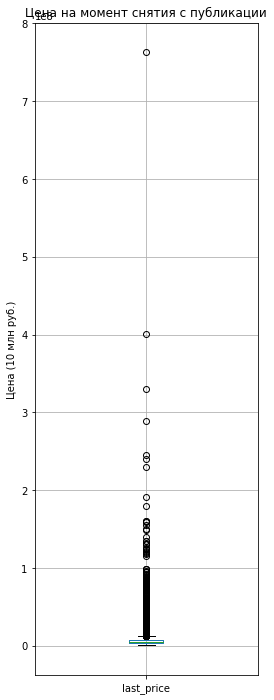

In [73]:
# построим график boxplot для визуализации распределения данных
data.boxplot('last_price', figsize=(4, 12))
plt.title('Цена на момент снятия с публикации')
plt.ylabel('Цена (10 млн руб.)')
plt.show()

Выбросы плотно сгруппированы примерно до 10 млн руб. Наличие точек выбросов, скорее всего, характеризует дорогое элитное жилье в центральных районах. Выберем квартиры до 70 млн руб. и взглянем на график еще раз.

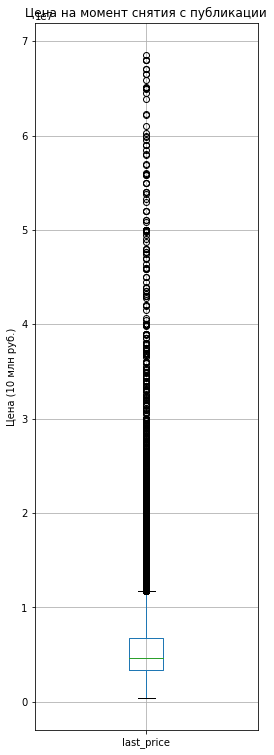

In [74]:
# выберем все квартиры с ценой до 10 млн рублей
data_price_filtered = data.query('last_price <= 70000000')
# построим по ним график размаха 
data_price_filtered.boxplot('last_price', figsize=(4, 13))
plt.title('Цена на момент снятия с публикации')
plt.ylabel('Цена (10 млн руб.)')
plt.show()

Нормальные значения находятся в диапазоне приблизительно до 12 млн руб. Выбросы плотно сгруппированы приблизительно до 30-40 млн, чуть менее плотно до 60-70 млн руб. Построим гистограмму для диапазона до 20 млн руб.

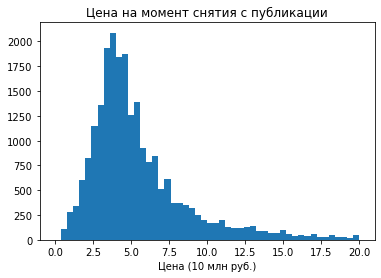

In [75]:
# построим гистограмму для выбранного диапазона
plt.hist(data['last_price']/1000000, bins=50, range=(0,20))
plt.title('Цена на момент снятия с публикации')
plt.xlabel('Цена (10 млн руб.)')
plt.show()

Больше всего квартир стоят приблизительно 5 млн рублей. Скорее всего это совокупность квартир в Ленобласти, где цены в целом ниже, а также маленьких студий в Санкт-Петербурге и пригородах (один из самых популярных тип квартир на данный момент, в том числе в новых строящихся домах, они часто становятся объектами купли-продажи).

##### Количество комнат

In [76]:
# взглянем на частоту данных по количеству комнат
data['rooms'].value_counts()

1     7833
2     7815
3     5737
4     1168
5      322
0      264
6      103
7       56
8       11
9        8
10       3
11       2
14       2
19       1
16       1
Name: rooms, dtype: int64

Будем иметь в виду выбросы в виде квартир с очень большим количеством комнат (10-19): это может быть элитное жилье или бывшие коммунальные квартиры в Санкт-Петербурге. Для удобства дальнейшего анализа отбросим эти строки и построим гистограмму по диапазону нормальных значений.

In [77]:
# выберем все строки с количеством комнат до 9
data = data.loc[data['rooms']<10][:]

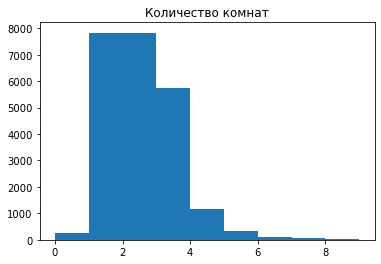

In [78]:
# построим гистограмму 
plt.hist(data['rooms'], bins=9)
plt.title('Количество комнат')
plt.show()

Больше всего однокомнатных и двухкомнатых квартир, чуть меньше трехкомнатных. Количество квартир с четырьмя и более комнатами значительно меньше.

In [79]:
# получим числовое описание данных по высоте потолков
data['ceiling_height'].describe()

count    23317.000000
mean         2.722387
std          0.237771
min          2.400000
25%          2.550000
50%          2.700000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

Среднее и медиана практически одинаковые, поскольку на этапе предобработке мы удалили аномальные значения. Посмотрим как распределяются данные.

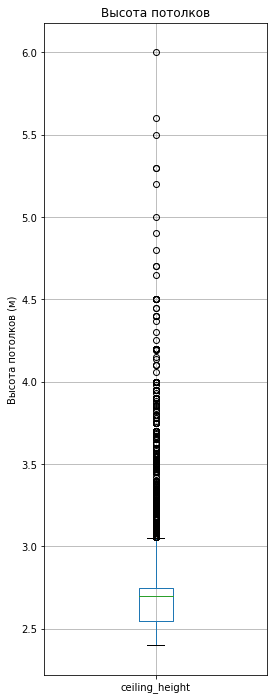

In [80]:
# построим график boxplot для визуализации распределения данных
data.boxplot('ceiling_height', figsize=(4, 12))
plt.title('Высота потолков')
plt.ylabel('Высота потолков (м)')
plt.show()

Нормальный размах значений находится в диапазоне от приблизительно 2.4 м до 3 м, больше всего квартир с потолками 2.5-2.7 м. Выбросы достаточно плотно сгруппированы до значения примерно 4 м, эти значения характерны для элитного жилья и старого фонда в центре Санкт-Петербурга.

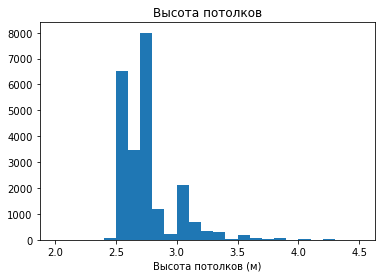

In [81]:
# построим гистограмму для выбранного диапазона
plt.hist(data['ceiling_height'], bins=(25), range=(2, 4.5))
plt.title('Высота потолков')
plt.xlabel('Высота потолков (м)')
plt.show()

Мы видим несколько пиков. Это может быть связано с типовыми значениями высоты потолка, а также с проведенной выше предобработкой данных, где мы заполняли пропуски медианными значениями по расположению и населенному пункту.

##### Этаж

In [82]:
# взглянем на частоту данных 
data['floor'].value_counts()

2     3316
3     3030
1     2872
4     2776
5     2588
6     1279
7     1201
8     1062
9     1038
10     678
11     515
12     509
13     368
15     336
14     329
16     310
17     223
18     172
19     142
21     117
20     108
22     108
23      98
24      60
25      43
26      23
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

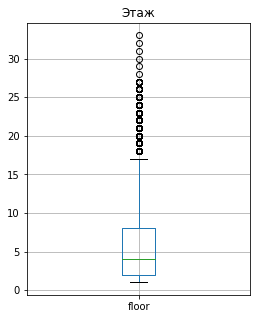

In [83]:
# построим график boxplot для визуализации распределения данных
data.boxplot('floor', figsize=(4, 5))
plt.title('Этаж')
plt.show()

Больше всего квартир в объявлениях располагаются на 1-8 этаже. Нормальный размах значений от 1-2 до 16 этажа. Квартиры на более высоких этажах отражены как выбросы.

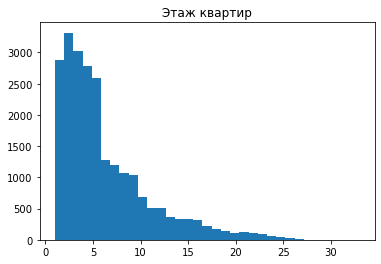

In [84]:
# построим гистограмму
plt.hist(data['floor'], bins=33, range=(1,33))
plt.title('Этаж квартир')
plt.show()

Мы видим пик на значениях 2 этаж. Далее значительный провал на 5 этаже: возможно, это связано с большим количеством домов до 5 этажей, например, старого фонда, «хрущевок», малоэтажной застройки в области и так далее.

##### Тип этажа квартиры

In [85]:
# взглянем на частоту данных 
data['floor_category'].value_counts()

другой       17169
последний     3276
первый        2872
Name: floor_category, dtype: int64

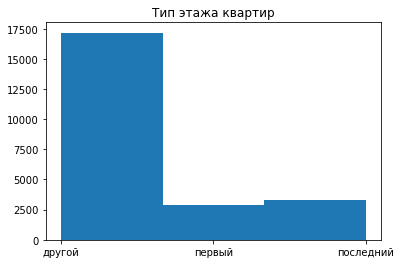

In [86]:
# построим гистограмму
plt.hist(data['floor_category'], bins=3)
plt.title('Тип этажа квартир')
plt.show()

Квартир на первом и последнем этаже примерно равное количество, большинство квартир располагаются на другом этаже.

##### Общее количество этажей

In [87]:
# взглянем на частоту данных 
data['floors_total'].value_counts()

5     5725
9     3739
16    1354
12    1352
4     1178
10    1171
25    1057
6      895
17     823
3      658
7      578
14     547
18     495
24     455
8      384
2      370
15     364
23     345
19     336
22     281
20     270
13     227
11     200
27     162
21     156
26     123
35      23
1       22
28      21
36       3
34       1
29       1
33       1
Name: floors_total, dtype: int64

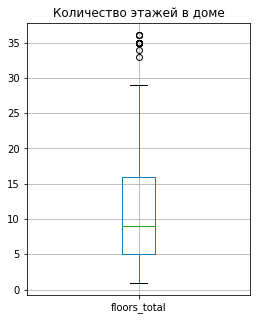

In [88]:
# построим график boxplot для визуализации распределения данных
data.boxplot('floors_total', figsize=(4, 5))
plt.title('Количество этажей в доме')
plt.show()

Больше всего домов от 5 до 16 этажей, что выглядит правдоподобно: это типовая застройка. Нормальный размах значений от 2 до 16 этажей в домах. Многоэтажные дома более 30 этажей отражены как выбросы: это высокие здания в Санкт-Петербурге.

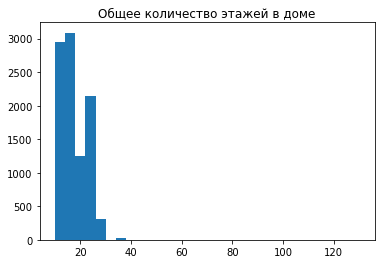

In [89]:
# построим гистограмму 
plt.hist(data['floors_total'], bins=30, range=(10,130))
plt.title('Общее количество этажей в доме')
plt.show()

Мы видим несколько пиков на графике: 5, 9, 12, 16 и 25 этажей. Это связано с типовой застройкой.

##### Расстояние до центра города

In [90]:
# получим числовое описание данных по расстоянию до центра города
data['city_centers_nearest'].describe()

count    17896.000000
mean     14210.566719
std       8616.374711
min        181.000000
25%       9259.250000
50%      13107.000000
75%      16293.250000
max      65968.000000
Name: city_centers_nearest, dtype: float64

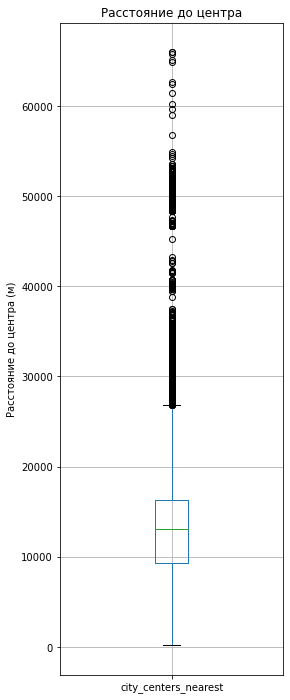

In [91]:
# построим график boxplot для визуализации распределения данных
data.boxplot('city_centers_nearest', figsize=(4, 12))
plt.title('Расстояние до центра')
plt.ylabel('Расстояние до центра (м)')
plt.show()

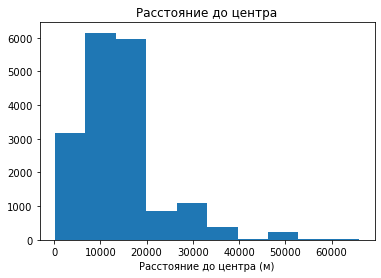

In [92]:
# построим гистограмму для выбранного диапазона
plt.hist(data['city_centers_nearest'])
plt.title('Расстояние до центра')
plt.xlabel('Расстояние до центра (м)')
plt.show()

Большинство квартир располагаются в радиусе приблизительно 10-17 км от центра города: скорее всего это квартиры в спальных районах Санкт-Петербурга, где много новых домов, в которых активно продаются квартиры. Нормальный размах значений от 0 до 26 км. Значительное количество квартир расположено в радиусе до 10 км от центра города. На этапе предобработки мы выяснили, что скорее всего картографические данные собирались по определенному радиусу — необходимо это учитывать.

##### Расстояние до ближайшего аэропорта

In [93]:
# получим числовое описание данных по расстоянию до ближайшего аэропорта
data['airports_nearest'].describe()

count    17873.00000
mean     28809.00056
std      12639.01607
min          0.00000
25%      18557.00000
50%      26766.00000
75%      37288.00000
max      84869.00000
Name: airports_nearest, dtype: float64

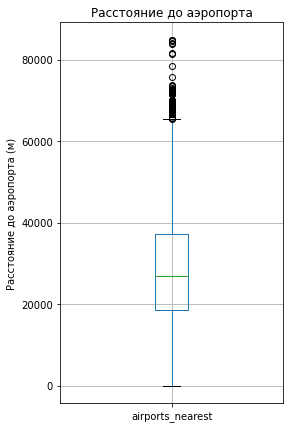

In [94]:
# построим график boxplot для визуализации распределения данных
data.boxplot('airports_nearest', figsize=(4, 7))
plt.title('Расстояние до аэропорта')
plt.ylabel('Расстояние до аэропорта (м)')
plt.show()

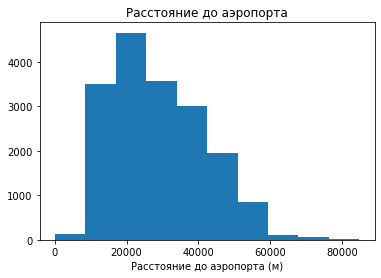

In [95]:
# построим гистограмму для выбранного диапазона
plt.hist(data['airports_nearest'])
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние до аэропорта (м)')
plt.show()

Больше всего квартир находятся на расстоянии приблизительно от 20 до 40 км от аэропорта. Провал на расстоянии до 10 км и резкое повышение далее на гистограмме объясняется тем, что в радиусе 10 км от Пулково нет жилой застройки (если прокладывать маршрут по дорогам).

##### Расстояние до ближайшего парка

In [96]:
# получим числовое описание данных по расстоянию до ближайшего парка
data['parks_nearest'].describe()

count    7950.000000
mean      490.801132
std       341.244248
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

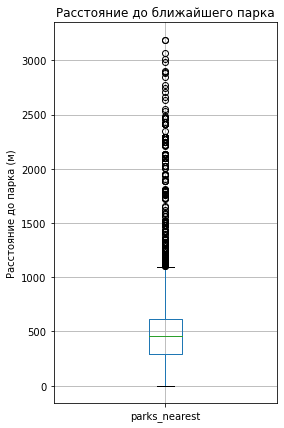

In [97]:
# построим график boxplot для визуализации распределения данных
data.boxplot('parks_nearest', figsize=(4, 7))
plt.title('Расстояние до ближайшего парка')
plt.ylabel('Расстояние до парка (м)')
plt.show()

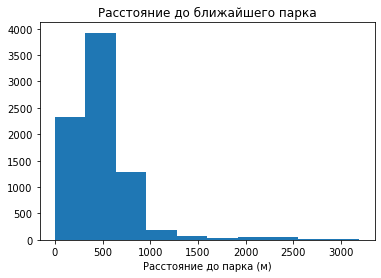

In [98]:
# построим гистограмму
plt.hist(data['parks_nearest'])
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до парка (м)')
plt.show()

Как мы выяснили на этапе предобработки, данные собирались только по квартирам, у которых есть парки в радиусе приблизительно 3 км, что необходимо учесть на этапе разведывания данных. Нормальный размах значений от нуля до 1 км, большинство квартир из имеющегося набора расположены в 500 метрах от парка.

##### День и месяц публикации объявления

In [99]:
# взглянем на частоту данных 
data['weekday'].value_counts()

3    4231
1    4118
4    3947
2    3911
0    3555
5    1894
6    1661
Name: weekday, dtype: int64

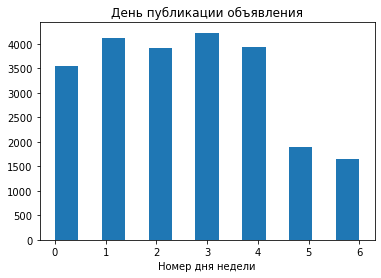

In [100]:
# построим гистограмму
plt.hist(data['weekday'], bins=13)
plt.title('День публикации объявления')
plt.xlabel('Номер дня недели')
plt.show()

Больше объявлений размещаются в будние дни (0-4).

In [101]:
# взглянем на частоту данных 
data['month'].value_counts()

2     2609
3     2544
11    2338
4     2336
10    2088
9     1954
6     1727
8     1722
7     1663
12    1617
1     1475
5     1244
Name: month, dtype: int64

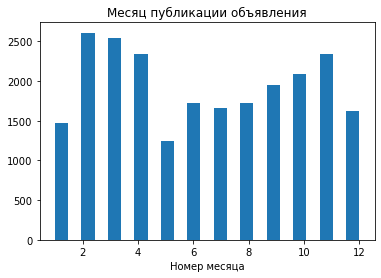

In [102]:
# построим гистограмму
plt.hist(data['month'], bins=23)
plt.title('Месяц публикации объявления')
plt.xlabel('Номер месяца')
plt.show()

Больше всего объявлений размещено в феврале, после январских праздников. Мало объявлений размещено в декабре-январе по причине закрытия года и праздников. Мы видим провал мае, вероятно, поскольку люди отмечают майские праздники, и летнее затишье, когда многие уезжают в отпуск.

##### Исследование времени продажи квартир

In [103]:
# получим числовое описание данных
data['days_exposition'].describe()

count    20177.000000
mean       181.096694
std        219.979696
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи больше медианного: это говорит о том, что в данных присутствуют необычно долгие продажи. Обычно время продажи занимает от 45 до 232 дней. Посмотрим ближе на распределение данных.

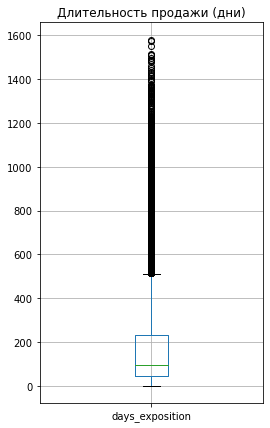

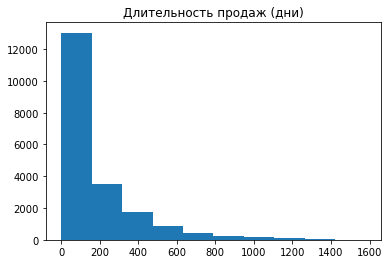

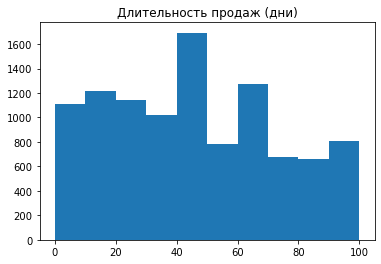

In [104]:
# построим график boxplot для визуализации распределения данных
data.boxplot('days_exposition', figsize=(4, 7))
plt.title('Длительность продажи (дни)')
plt.show()

# построим гистограмму
plt.hist(data['days_exposition'])
plt.title('Длительность продаж (дни)')
plt.show()

# построим гистограмму для диапазона до 100 дней
plt.hist(data['days_exposition'], range=(0,100))
plt.title('Длительность продаж (дни)')
plt.show()

На графике видно, что есть большое количество квартир, проданных менее чем за 100 дней. Быстрыми продажами можно считать те, которые произошли в период меньше одного-полутора месяца со дня размещения. Долгие продажи длятся более 232 дней, необычно долгие продажи начинают от приблизительно полутора лет.
Также есть пики на 45 и 60 дней, ровно на 1,5 и 2 месяца, они наверняка связаны с особенностями сервиса, возможно, это какие-то подписки, по которым объявление закрывается через 45 или 60 дней автоматически.

##### Выводы по одномерному анализу

Большая часть квартир имеет общую площадь 40-70 кв. м, жилую площадь 19-42 кв. м, площадь кухни 7-12 кв. м, высоту потолка 2,55-2,75, стоят от 3,5 до 6,8 млн рублей, находятся на 2-8 этаже (не на первом или последнем), в домах с 5, 9 или 16 этажами.

Большинство квартир, по которым собирались картографические данные, находятся в радиусе 10-17 км от центра города, 20-40 км от аэропорта и имеют парк в радиусе 500 м.

Чаще всего объявления размещаются в будние дни. Больше всего объявлений было размещено в феврале. Меньше объявлений размещается в мае, летом и в период декабрь-январь, вероятно, по причине праздников и отпусков.

Чаще всего квартиры продаются за 45-232 дня. Есть квартиры, которые продали быстро, меньше чем за месяц, и очень долго, спустя более полутора лет с момента размещения объявления.

#### Изучение факторов, влияющих на формирование цены

Изучим зависимость цены от общей площади, жилой площади, площади кухни, количества комнат, типа этажа, на котором расположена квартира, и даты размещения. Можем предположить наличие линейной зависимости между количественными переменными (данные по площадам, количество комнат) и ценой: проверим ее с помощью рассчета коэффициента корреляции Пирсона. Для дня, месяца, года размещения выведем отсортированные сводные таблицы с рассчетом медианной цены. Построим графики для визуализации зависимости.

In [105]:
# напишем функцию для работы с числовыми факторами
def correlation(column_name):
    # которая построит график рассеяния
    data.plot(x=column_name, y='last_price', kind='scatter', grid=True, alpha=0.5)
    plt.show()
    # создаст сводную таблицу 
    pivot_data = data.pivot_table(index=column_name, values='last_price', aggfunc = ['mean', 'count', 'median'])
    pivot_data.columns=['mean', 'count', 'median']
    # визуализирует медианное значение из сводной таблицы
    pivot_data.plot(y='median', grid=True, alpha=0.3)
    plt.show()
    # рассчитает коэффициент корреляции
    return data[column_name].corr(data['last_price'])

##### Зависимость цены и общей площади

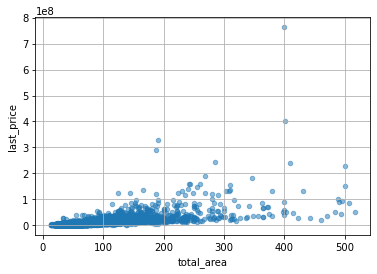

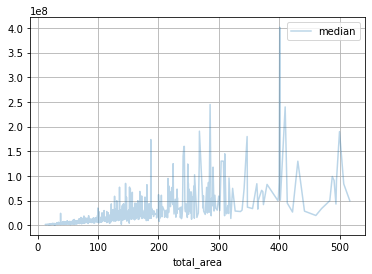

0.6322794356075466

In [106]:
# применим ранее написанную функцию к столбцу с общей площадью
correlation('total_area')

Коэффициент корреляции 0.69 говорит о наличии связи между ценой и общей площадью: чем больше площадь, тем выше цена. Это видно и на графиках.

##### Зависимость цены и жилой площади

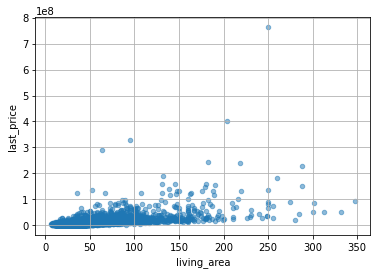

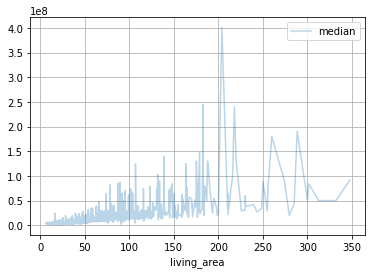

0.5720269305781142

In [107]:
# применим ранее написанную функцию к столбцу с жилой площадью
correlation('living_area')

Коэффициент корреляции 0.62 и графики показывают наличие зависимости: чем больше жилая площадь, тем выше цена квартиры.

##### Зависимость цены и площади кухни

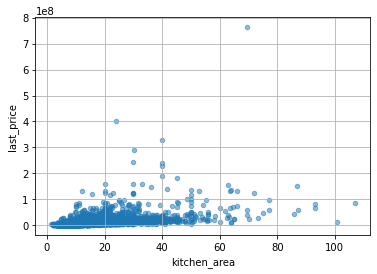

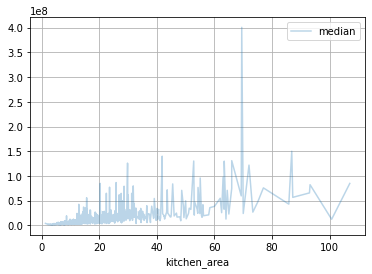

0.5025016938971122

In [108]:
# применим ранее написанную функцию к столбцу с площадью кухни
correlation('kitchen_area')

Коэффициент корреляции 0.54 и графики показывают наличие линейной зависимости: чем больше площадь кухни, тем выше цена.

Мы установили наличие положительной линейной зависимости площади и цены квартиры. Больше всего на цену квартиры влияет общая площадь, меньше — жилая, наименьшее влияние оказывает площадь кухни. Однако связь не слишком сильная даже у общей площади. Это логично, ведь на цену квартиры влияет множество других факторов: район, качество ремонта и так далее.

##### Зависимость цены и количества комнат

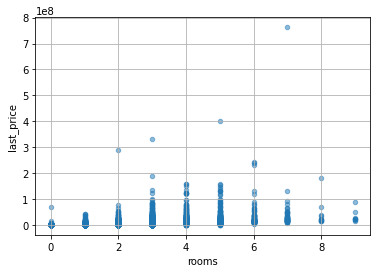

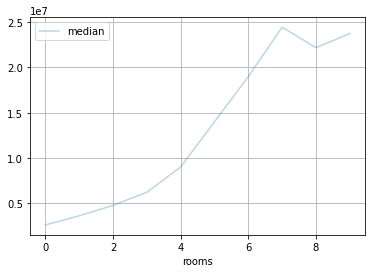

0.35524698217724177

In [109]:
# применим ранее написанную функцию к столбцу с количеством комнат
correlation('rooms')

Между количеством комнат и ценой есть слабая линейная зависимость с коэффициентом корреляции 0.39. Чем больше комнат в квартире, тем ее цена выше. При этом связь ожидаемо меньше, чем с площадью.

##### Зависимость цены и типа этажа

In [110]:
# выведем сводную таблицу для цены по типам этажа 
pivot_floor = data.pivot_table(index='floor_category', values='last_price', aggfunc = ['count', 'median']).reset_index()
pivot_floor.columns=['Тип этажа', 'Кол-во квартир', 'Медианная цена']
pivot_floor

,Тип этажа,Кол-во квартир,Медианная цена
0,другой,17169,4850000.0
1,первый,2872,3900000.0
2,последний,3276,4300000.0


Нужно учитывать, что доля квартир на первом или последнем этаже вместе взятых меньше, чем на других этажах.

<AxesSubplot:xlabel='Тип этажа'>

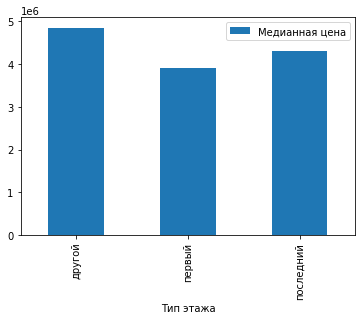

In [111]:
# построим столбчатую диаграмму для наглянности
pivot_floor.plot(x='Тип этажа', y='Медианная цена', kind='bar')

Квартиры на первом этаже стоят приблизительно на 20% меньше, чем квартиры на другом этаже. Менее значительная разница с последним этажом. Ожидаемо, квартиры на другом этаже стоят больше, чем на первом или последнем.

Нахождение на типе этажа "другой" может быть принято за базовое референсное значение, в то время как нахождение на первом или последнем этаже имеет определенную специфику, влияющую на цену квартиры. Так, сравнивая разницы в медианной цене относительно типа этажа "другой", нахождение квартиры на первом этаже можно рассматривать как более весомый фактор влияния на цену, чем если она находится на последнем этаже.

##### Зависимость цены и даты размещения

In [112]:
# выведем сводную таблицу для цены по дням недели размещения объявления 
pivot_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc = ['count', 'median']).reset_index()
pivot_weekday.columns=['День недели', 'Кол-во квартир', 'Медианная цена']
pivot_weekday.sort_values(by='Медианная цена')

,День недели,Кол-во квартир,Медианная цена
4,4,3947,4550000.0
5,5,1894,4550000.0
6,6,1661,4550000.0
0,0,3555,4650000.0
3,3,4231,4650000.0
2,2,3911,4700000.0
1,1,4118,4704595.0


<AxesSubplot:xlabel='weekday'>

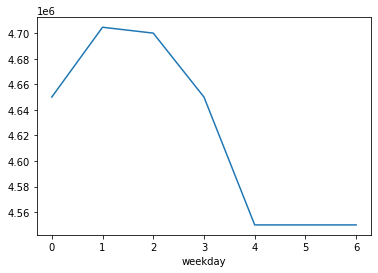

In [113]:
# построим график для наглянности
data.groupby('weekday')['last_price'].median().plot()

Разница между минимальным и максимальным медианным значением цены по дням недели незначительна: 4.6 млн и 4.7 млн рублей. Также, как мы выяснили выше и как видно из сводной таблицы, в выходные дни было размещено меньше объявлений, чем в будние дни. Так, исходя из имеющихся данных можно сделать вывод об отсутствии связи между днем недели размещения объявления и ценой квартиры.

In [114]:
# выведем сводную таблицу для цены по месяцу размещения объявления 
pivot_month = data.pivot_table(index='month', values='last_price', aggfunc = ['count', 'median']).reset_index()
pivot_month.columns=['Месяц', 'Кол-во квартир', 'Медианная цена']
pivot_month.sort_values(by='Медианная цена')

,Месяц,Кол-во квартир,Медианная цена
5,6,1727,4400000.0
4,5,1244,4515000.0
9,10,2088,4570000.0
7,8,1722,4580000.0
0,1,1475,4600000.0
6,7,1663,4600000.0
1,2,2609,4650000.0
2,3,2544,4650000.0
11,12,1617,4690000.0
8,9,1954,4700000.0


<AxesSubplot:xlabel='month'>

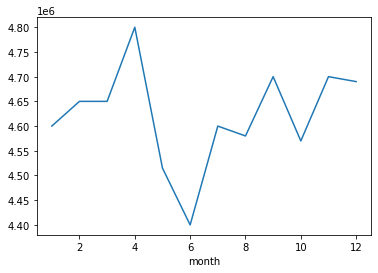

In [115]:
# построим график для наглянности
data.groupby('month')['last_price'].median().plot()

Как и в случае с днями недели размещения объявлений, разница минимальной (июнь) и максимальной (апрель) медианной ценой по месяцам незначительна в масштабах рынка недвижимости — приблизительно 400 тыс. рублей, при этом логика сезонной зависимости из графика не прослеживается. Так, исходя из имеющихся данных можно сделать вывод об отсутствии связи между месяцем размещения объявления и ценой квартиры.

In [116]:
# выведем сводную таблицу для цены по году размещения объявления 
pivot_year = data.pivot_table(index='year', values='last_price', aggfunc = ['count', 'median']).reset_index()
pivot_year.columns=['Год', 'Кол-во квартир', 'Медианная цена']
pivot_year.sort_values(by='Медианная цена')

,Год,Кол-во квартир,Медианная цена
3,2017,8086,4500000.0
2,2016,2716,4550000.0
4,2018,8387,4570000.0
5,2019,2838,5050000.0
1,2015,1159,5300000.0
0,2014,131,8037000.0


Стоит учесть, что доля размещенных в 2014 году объявлений в датасете невелика. Построим график, чтобы увидеть общую тенденцию.

<AxesSubplot:xlabel='year'>

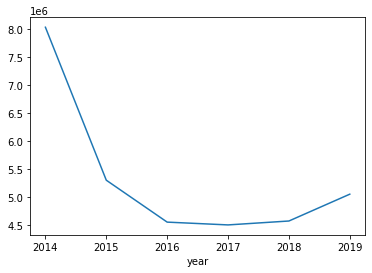

In [117]:
# построим график для наглянности
data.groupby('year')['last_price'].median().plot()

Несмотря на то, что данных для 2014 года недостаточно, мы видим общий тренд на снижение цены, продолжающийся до 2017 года. К 2015 году медианная цена упала более чем на 2 млн, к 2016 еще на 1 млн. С 2017 года медианная цена начала медленно расти, но к 2019 году едва достигла цены 2015. Таким образом, мы можем сделать вывод, что цена зависит от года размещения и связана с состоянием рынка недвижимости и общей экономической обстановкой.

##### Выводы о факторах, влияющих на формирование цены

Была изучена зависимость цены от общей и жилой площади, площади кухни, количества комнат, типа этажа и даты размещения.

Выявлена линейная зависимость цены квартиры и ее площади: чем больше площадь, тем выше цена. Наиболее сильная зависимость от общей площади с коэффициентом корреляции 0.69, менее сильная связь с жилой площади с коэффициентом 0.62, площадь кухни влияет меньше всего: коэффициент корреляции 0.54. Еще меньше на цену влияет количество комнат: коэффициент корреляции 0.39.

Было выяснено, что расположение квартиры на первом и последнем этаже уменьшают ее стоимость. При этом больше снижает цену расположение на первом этаже (≃20% относительно других этажей), чем на последнем (≃10% относительно других этажей).

При изучении даты размещения объявления было выявлено влияние года размещения: цены на квартиры падали с 2014 года и стали расти с 2017. Однако к 2019 году едва достигли показателей 2015. Не удалось выявить наличие связи цены с днем недели и месяцем размещения объявления.

#### Исследование средней цены по населенным пунктам

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [118]:
# выведем сводную таблицу по населенным пунктам, где посчитаем количество объявлений и среднюю цену квадратного метра
top_locality = data.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count', 'mean']).reset_index()
top_locality.columns=['Населенный пункт', 'Кол-во объявлений', 'Средняя цена кв.м']
# оставим 10 населенных пунктов с наибольшим количеством объявлений 
top_locality = top_locality.sort_values(by='Кол-во объявлений', ascending=False).head(10)
top_locality

,Населенный пункт,Кол-во объявлений,Средняя цена кв.м
224,санкт-петербург,15496,114578.948116
151,мурино,573,85801.052356
109,кудрово,464,95226.801724
298,шушары,437,78483.691076
35,всеволожск,389,68648.676093
203,пушкин,368,103179.959239
92,колпино,337,75480.118694
176,парголово,326,90134.650307
43,гатчина,303,68624.689769
36,выборг,232,58402.168103


In [119]:
# выберем строку с максимальной средней ценой 
top_locality[top_locality['Средняя цена кв.м'] == top_locality['Средняя цена кв.м'].max()]

,Населенный пункт,Кол-во объявлений,Средняя цена кв.м
224,санкт-петербург,15496,114578.948116


In [120]:
# выберем строку с минимальной средней ценой 
top_locality[top_locality['Средняя цена кв.м'] == top_locality['Средняя цена кв.м'].min()]

,Населенный пункт,Кол-во объявлений,Средняя цена кв.м
36,выборг,232,58402.168103


<AxesSubplot:xlabel='Населенный пункт'>

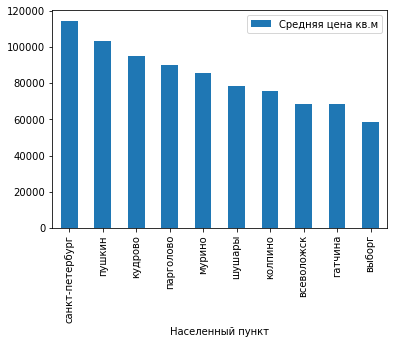

In [121]:
top_locality.sort_values(by='Средняя цена кв.м', ascending=False).plot(x='Населенный пункт', y='Средняя цена кв.м', kind='bar')

Из 10 населенных пунктов с наибольшим количеством объявлений самая высокая средняя стоимость квадратного метра — в Санкт-Петербурге (≃ 115 тыс. рублей), самая низкая — в Выборге (≃ 58 тыс. рублей).

#### Исследование расстояния до центра города (Санкт-Петербург)

Изучим как стоимость квартиры зависит от расстояния до центра города.

<AxesSubplot:xlabel='city_centers_nearest'>

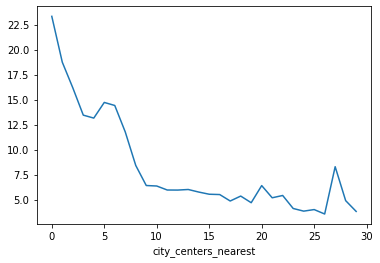

In [122]:
# выберем данные по цене и расстоянию до центра города для Санкт-Петербурга
spb = data.loc[(data['locality_name']=='санкт-петербург') & ~(data['city_centers_nearest'].isna()), ('last_price','city_centers_nearest')]

# округлим расстояние до центра до километров и переведем в целочисленный тип
spb['city_centers_nearest'] /= 1000
spb['city_centers_nearest'] = spb['city_centers_nearest'].astype('int')
# для удобства отобразим цену в миллионах
spb['last_price'] /=1000000

# посчитаем цену каждого километра и построим график
spb.groupby('city_centers_nearest')['last_price'].mean().plot()

График показывает общую тенденцию: чем ближе квартира к центру городу, тем выше ее стоимость. Квартиры в самом центре (0 км) в среднем стоят 22-23 млн рублей, дальше мы наблюдаем резкое снижение средней цены. Небольшое повышение стоимости квартир в радиусе 8 км от центра может быть связано с застройкой более новых районов (где меньше старого фонда) жилыми комплексами комфорт класса или удобной транспортной доступностью. Дальше мы видим продолжение тренда, средняя цена снижается до приблизительно 6 млн к 10 километру и далее снижение замедляется. Колебания на 20 и 27 км могут быть также связаны с застройкой новыми комплексами высокого класса.

### Общий вывод

Была выполнена предобработка данных: мы избавились от неявных дубликатов, обработали пропуски и привели типы данных к нужным, обработали аномальные значения и добавили необходимые столбцы.

В результате одномерного анализа было выявлено: 

**Общая площадь**. Типичное значение площади — 52 кв. м (медиана). Чаще всего встречаются квартиры общей площадью **40-70 кв. м**. Нормальный диапазон значений включает 20-120 кв. м, но достаточно плотно сгруппированы и выбросы — квартиры от 120 до 350 кв. м. Это нормально для Санкт-Петербурга: присутствует жилье с большой площадью в историческом центре, а также в отдельных районах (например, Крестовский остров, Петроградская сторона и т.д.) — премиум класса. Следует учесть квартиры с очень маленькой площадью (до 20 кв.м), которые также характерны для города: бывшие коммунальные квартиры (квартиры старого фонда) переделывают в несколько малометражных студий. 

**Жилая площадь и площадь кухни.** Чаще всего встречаются квартиры с жилой площадью **19-42 кв. м** и площадью кухни **7-12 кв. м**, однако встречаются квартиры с кухней до 1.3 м — такое маленькое значение площади кухни встречается в студиях. 

**Цена на момент снятия с публикации**. Средняя цена квартиры — 6.5 млн, медианная — 4.7 млн руб, поскольку встречаются очень дорогие квартиры до 763 млн. руб. Несмотря на то, что они отражены как выбросы, нам стоит их учитывать: это сегмент дорого жилья в Санкт-Петербурге. Чаще всего квартиры стоят **от 3.5 млн рублей до 6.8 млн рублей**, однако плотно сгруппированы выбросы до 10 млн (такие значения встречаются достаточно часто). 

**Высота потолков**. Чаще всего встречаются потолки **2.55-2.75 м**. Нормальный диапазон значений — 2.4-3 м, однако часто встречаются квартиры с потолками до 4 м: скорее всего это старый фонд в историческом центре Санкт-Петербурга. 

**Этажи**. Чаще всего встречаются квартиры на 2-9 этажах, нормальный диапазон — **1-16 этаж**, что совпадает с показателями по общему количеству этажей в доме (пятиэтажки, девятиэтажно, шестнадцатиэтажки, однако встречаются высокие дома до 36 этажей). Квартиры на первом и последнем этаже встречаются реже, чем на категории этажа «другой». 

**Расстояние до центра.** Данные собирались приблизительно в диапазоне до 65 км. Чаще всего встречаются квартиры, находящиеся в радиусе от **10 до 17 км** от центра (квартиры в пределах Санкт-Петербурга). 

**Расстояние до аэропорта.** Чаще всего квартиры находятся на расстоянии **18-37 км** до аэропорта. 

**Расстояние до парка.** Данные собирались приблизительно до 3 км. Большинство квартир имеют парк в шаровой доступности: в **300-612 метрах**.

**Дата публикации объявлений**.  На выходных размещается в два раза меньше объявлений, чем в будние дни. Присутствует сезонность: больше объявлений размещается в феврале-марте-апреле, когда уже прошли новогодние праздники и еще не начались майские. Летом размещается мало объявлений, люди отдыхают и занимаются отпуском. Количество объявлений растет к ноябрю, однако падает в декабре (конец года и приближающиеся праздники). 

**Время продажи квартир**. Большинство квартир продается за **45-232 дня**. Однако есть очень быстрые продажи (до 1 месяца) и очень медленные (от полутора лет). 

**Какие факторы влияют на цену квартиры?** Наибольшая зависимость от общей площади: чем она выше, тем дороже квартира. Однако коэффициент корреляции 0.69 говорит о том, что на цену квартиры влияет множество других факторов (район, ремонт и т.д.). Меньше зависимость от площади кухни, жилой площади и количества комнат. Квартиры на первом и последнем этаже стоят дешевле квартир на других этажах, причем нахождение на первом этаже сильнее удешевляет квартиру. На цену также влияет общее положение в экономике и на рынке недвижимости: так, приблизительно в 2014-2017 году наблюдался провал в ценах на квартиры, а в 2017 году началось плавное повышение. 

**Средняя цена квадратного метра**. Из 10 населенных пунктов с наибольшим количеством объявлений самая высокая средняя стоимость квадратного метра — в Санкт-Петербурге (≃ 115 тыс. рублей), самая низкая — в Выборге (≃ 58 тыс. рублей). Так, населенный пункт влияет на цену квартиры. 

**На цену квартиры также влияет расстояние до конца города**: квартиры в центре стоят в среднем 22.5 млн рублей, в то время как квартиры в 10 км стоят уже значительно меньше, в среднем 7 млн рублей. 